# Import Libraries

In [110]:
# suppresse future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [111]:
import pandas as pd
import numpy as np
import plotly.express as px

In [112]:
# configure loggin and test that it is working
import logging
logging.basicConfig(filename='cw01.log', filemode='w', level=logging.CRITICAL)
logging.warning('Watch out!')

# Load and explore the data (4 marks)

In [113]:
# load the dataset
source_path = 'data/raw/product-cat-dataset.csv'
#source_path = 'data/raw/product-category-dataset.csv'

df_source = pd.read_csv(source_path)
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10649 entries, 0 to 10648
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  10637 non-null  object
 1   Level_1      10649 non-null  object
 2   Level_2      10649 non-null  object
 3   Level_3      10649 non-null  object
dtypes: object(4)
memory usage: 332.9+ KB


In [114]:
df_source.head()

,Description,Level_1,Level_2,Level_3
0,gerb cap help keep littl on head cov warm day ...,09BF5150,C7E19,D06E
1,newborn inf toddl boy hoody jacket oshkosh b g...,2CEC27F1,ADAD6,98CF
2,tut ballet anym leap foxy fash ruffl tul toddl...,09BF5150,C7E19,D06E
3,newborn inf toddl boy hoody jacket oshkosh b g...,2CEC27F1,ADAD6,98CF
4,easy keep feel warm cozy inf toddl girl hoody ...,2CEC27F1,ADAD6,98CF


## Explore Levels

Get an overview of hirachy of levels used in the dataset.

In [115]:
# perform data grouping
source_grouped = df_source.groupby(['Level_1', 'Level_2', 'Level_3'])
source_grouped_count = source_grouped.size().to_frame(name = 'count')
source_grouped_count.head(10)

count
Level_1  Level_2 Level_3       
014303D1 77F62   5AE1       229
         7AED7   6539       282
09BF5150 262E7   29B3        65
         5E038   6BE5       118
         6C6B1   3AAD        38
         915D4   A2FA        47
         A6301   DC8D         1
         AF6B9   A104        38
         C7E19   D06E       429
         F824F   7288        74

In [116]:
# visualize the dataset hirachy
fig = px.treemap(source_grouped_count.reset_index(), path=['Level_1', 'Level_2', 'Level_3'], values='count')
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25))
fig.show()

In [117]:
def print_categories(data:pd.DataFrame):
    """
    Print a count of the distinct categories in the dataset.
    """
    # determine the number of distinct
    print('--- Distinct Categories ---')
    print('Level 1 : %d' % data[['Level_1']].drop_duplicates().shape[0])
    print('Level 2 : %d' % data[['Level_2']].drop_duplicates().shape[0])
    print('Level 3 : %d' % data[['Level_3']].drop_duplicates().shape[0])
    print('All     : %d' % data[['Level_1', 'Level_2', 'Level_3']].drop_duplicates().shape[0])

# show the number of distinct categories in the dataset
print_categories(df_source)

--- Distinct Categories ---
Level 1 : 15
Level 2 : 39
Level 3 : 43
All     : 43


## Deal with Missing Data (4 marks)

In [118]:
# Check if data has missing values in the Description column
df_source.isna().sum()

Description    12
Level_1         0
Level_2         0
Level_3         0
dtype: int64

In [119]:
# show the rows with missing values
df_source.iloc[df_source.index[df_source.isnull().any(axis=1)]]

,Description,Level_1,Level_2,Level_3
1063,NaN,4C3D8686,74974,62E8
3435,NaN,09BF5150,F824F,7288
3459,NaN,09BF5150,F824F,7288
7763,NaN,09BF5150,6C6B1,3AAD
7797,NaN,09BF5150,6C6B1,3AAD
7805,NaN,09BF5150,5E038,6BE5
7817,NaN,09BF5150,5E038,6BE5
7868,NaN,09BF5150,5E038,6BE5
7945,NaN,09BF5150,262E7,29B3
7971,NaN,09BF5150,262E7,29B3


In [120]:
# Deal with missing values
df_clean = df_source.dropna()
df_clean.shape

(10637, 4)

In [121]:
# show the number of caterories remaining after dropping null values
print_categories(df_clean)

--- Distinct Categories ---
Level 1 : 15
Level 2 : 39
Level 3 : 43
All     : 43


## Drop Classes where the number of instances is < 10 (4 marks)

In [122]:
def remove_small_categories(data:pd.DataFrame, column:str, n:int):
    """
    This function find instances in the dataset provided and find instances in the specified column that has less than n rows.

    Returns:
        The original dataset with categories that have less than n rows have been removed.
    """
    df_counts = data[column].value_counts().to_frame('counts')
    remove_list = set(df_counts[df_counts.counts < n].index.values)
    
    return data.query('%s not in @remove_list' % column)

In [123]:
# Apply to Level_1 
df_clean = remove_small_categories(df_clean, 'Level_1', 10)
df_clean.shape

(10637, 4)

In [124]:
# Apply to Level_2
df_clean = remove_small_categories(df_clean, 'Level_2', 10)
df_clean.shape

(10629, 4)

In [125]:
# Apply to Level_3
df_clean = remove_small_categories(df_clean, 'Level_3', 10)
df_clean.shape

(10627, 4)

In [126]:
# convert the levels to categories
level_cols = ['Level_1', 'Level_2', 'Level_3']
df_clean[level_cols] = df_clean[level_cols].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10627 entries, 0 to 10648
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Description  10627 non-null  object  
 1   Level_1      10627 non-null  category
 2   Level_2      10627 non-null  category
 3   Level_3      10627 non-null  category
dtypes: category(3), object(1)
memory usage: 200.5+ KB


In [127]:
# reset the index
df_clean.reset_index(inplace=True, drop=True)
df_clean.head()

,Description,Level_1,Level_2,Level_3
0,gerb cap help keep littl on head cov warm day ...,09BF5150,C7E19,D06E
1,newborn inf toddl boy hoody jacket oshkosh b g...,2CEC27F1,ADAD6,98CF
2,tut ballet anym leap foxy fash ruffl tul toddl...,09BF5150,C7E19,D06E
3,newborn inf toddl boy hoody jacket oshkosh b g...,2CEC27F1,ADAD6,98CF
4,easy keep feel warm cozy inf toddl girl hoody ...,2CEC27F1,ADAD6,98CF


<AxesSubplot:>

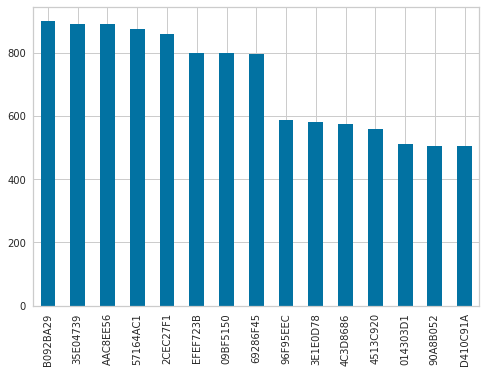

In [128]:
# level 1 distribution
df_clean.Level_1.value_counts().plot(kind='bar')

In [129]:
# level 2 distribution
df_clean.Level_2.value_counts()

2D5A3    797
ACD06    504
C719A    482
9D9EE    462
375FE    450
5A8AB    450
B2DB4    449
CB803    448
BAE8A    448
9B69F    447
74974    446
914A1    443
390F1    441
94728    439
C7E19    429
7B638    420
A04D3    411
ADAD6    410
F4055    363
7AED7    282
02FA0    264
77F62    229
36080    176
223B2    128
E6162    117
5E038    115
E69F5    109
D5531     88
31FED     86
F824F     72
262E7     63
915D4     47
AF6B9     36
6C6B1     36
08960     24
0864A     16
Name: Level_2, dtype: int64

In [130]:
# level 3 distribution
df_clean.Level_3.value_counts()

28A7    797
33D1    504
A0E2    482
05A0    462
AA6B    450
1F61    450
21DA    449
2ABA    448
627D    448
80C4    447
62E8    446
D97D    443
6856    441
5912    439
D06E    429
0F8B    420
C5B4    411
98CF    410
6539    282
078B    264
5AE1    229
1F75    199
C563    176
7C00    164
F213    128
2E14    117
6BE5    115
DDD5    109
6253     88
7288     72
29B3     63
3DD3     53
A2FA     47
A104     36
3AAD     36
215F     33
1000     24
96B8     16
Name: Level_3, dtype: int64

### Now let's write a Function to Prepare Text (4 marks)
We will apply it to our DataFrame later on

* This function receives a text string and performs the following:
* Convert text to lower case
* Remove punctuation marks
* Apply stemming using the popular Snowball or Porter Stemmer (optional)
* Apply NGram Tokenisation
* Return the tokenised text as a list of strings

In [131]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [132]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import re

def process_text(text, n = 1):
    """
    Takes in a string of text, then performs the following:
    1. Convert text to lower case and remove all punctuation
    2. Optionally apply stemming
    3. Apply Ngram Tokenisation
    4. Returns the tokenised text as a list
    """
    # convert to lower case & 
    text = text.lower()

    # remove punctuation
    #text = re.sub("[^0-9A-Za-z ]", "" , text)
    text = re.sub("[^A-Za-z ]", "" , text)

    # split the text into tokens
    tokens = word_tokenize(text)

    # perform stemming
    ps = PorterStemmer()
    tokens = [ps.stem(token)  for token in tokens]

    #return ' '.join(tokens)

    # get the ngrams
    n_grams  = ngrams(tokens, n)

    # return the ngrams as a list of strings
    return [ ' '.join(grams) for grams in n_grams]
    #return list(n_grams)

In [133]:
# Here is an example function call
process_text("Here we're testing the process_text function, results are as follows:", n = 3)

['here were test',
 'were test the',
 'test the processtext',
 'the processtext function',
 'processtext function result',
 'function result are',
 'result are as',
 'are as follow']

In [134]:
# Results should look like this:
['here were test',
 'were test the',
 'test the processtext',
 'the processtext function',
 'processtext function result',
 'function result are',
 'result are as',
 'are as follow']

['here were test',
 'were test the',
 'test the processtext',
 'the processtext function',
 'processtext function result',
 'function result are',
 'result are as',
 'are as follow']

### Now let's apply TF-IDF to extract features from plain text (10 marks)

In [135]:
# Might take a while...
# Here you apply the process_text function to the Description column of the data
# Then you pass the results to the bag of words tranformer
# See here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [136]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD

In [137]:
def bow_transform(corpus, n=3, max_features=None):
    """
    Perform the bag-of-words transformation on the document corpus. The number of ngrams to use as tokens is specified using the n argument.
    """
    count_vectorizer = CountVectorizer(analyzer=lambda x:process_text(x, n), max_features=max_features)
    bow = count_vectorizer.fit_transform(corpus)

    return count_vectorizer, bow

# test the functon
test_docs = [
    "Here we're testing the process_text function, results are as follows:",
    "Here you apply the process_text function to the Description column of the data"
]

count_vectorizer, bow = bow_transform(test_docs)
print(count_vectorizer.get_feature_names())
print(bow.toarray())

['appli the processtext', 'are as follow', 'column of the', 'descript column of', 'function result are', 'function to the', 'here were test', 'here you appli', 'of the data', 'processtext function result', 'processtext function to', 'result are as', 'test the processtext', 'the descript column', 'the processtext function', 'to the descript', 'were test the', 'you appli the']
[[0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0]
 [1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1]]


During model evaluation it was found that using 3 ngrams is not ideal and better model performance is posible if ngrams are not created.

In [138]:
# vectorize the description column in the dataset
count_vectorizer, bow = bow_transform(df_clean.Description, n=1)

In [ ]:
#print(count_vectorizer.get_feature_names())
print('Feature Count:', len(bow.toarray()[0]))

Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of text file contents. Let's go ahead and check out how the bag-of-words counts for the entire corpus in a large, sparse matrix:

In [ ]:
# After that you pass the result of the previous step to sklearn's TfidfTransformer
# which will convert them into a feature matrix
# See here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(bow)
print('Feature Count:', len(text_tfidf.toarray()[0]))

In [ ]:
# perform dimensionality reduction
dim_reduction = True
n_components = 50 #500 #100 #50 #2000

if dim_reduction:
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    text_svd = svd.fit_transform(text_tfidf)

    print('Total variance explained: %.2f' % svd.explained_variance_ratio_.sum())
else:
    text_svd = text_tfidf.toarray()

In [ ]:
# The resulting matrix is in sparse format, we can transform it into dense
# Code prepared for you so you can see what results look like
#text_tfidf = pd.DataFrame(text_tfidf.toarray())
text_tfidf = pd.DataFrame(text_svd)
text_tfidf.shape

In [ ]:
# This is an example result, the matrix will contain lots of zero values, that is expected
# Some values will be non-zero
text_tfidf.head()

# Now the Data is Ready for Classifier Usage

### Split Data into Train and Test sets (4 marks)

In [ ]:
from sklearn.model_selection import train_test_split

# get the dependent and indeendent variables
y = df_clean.drop('Description', axis=1)
X = text_tfidf

# Train/Test split
#X_train, X_test, y_train, y_test = train_test_split(X.index,y,test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

print('Training Set : %d' % X_train.shape[0])
print('Testing  Set : %d' % X_test.shape[0])

In [ ]:
# You might need to reset index in each dataframe (depends on you how you do things)
# done for you to make it clearer
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [ ]:
# You might need to take classes as separate columns (depends on you how you do things)
class1 = y_train['Level_1'].astype(str)
class2 = y_train['Level_2'].astype(str)
class3 = y_train['Level_3'].astype(str)

## Model training for the three levels (8 marks)

In [ ]:
from pycaret.classification import *

In [ ]:
def create_model(data:pd.DataFrame, target:str, session_id:int=None, exclude=None):
    '''
    Create a classification model for the dataset provided.

    Parameters:
        data: pandas.DataFrame
            The DataFrame to build the model for.
        target: str
            The name of the target variable.
        exclude: list of str, default = None
            To omit certain models from training and evaluation, pass a list containing model id in the exclude parameter. 
    Returns:
    '''
    # create the classifier for the model
    logging.info('Setting up the classifier...')
    classifier = setup(
        data = data, 
        target = target, 
        session_id=session_id,
        verbose=False,
        silent=True) 

    # search for the best classifier
    logging.info('Finding the best model...')
    best = compare_models(
        verbose=False,
        exclude=exclude)

    # tune the model
    logging.info('Tuning the model...')
    tuned_model = tune_model(best, verbose=False)

    # finalize the model and return the results
    #logging.info('Finalizing the model...')
    #return finalize_model(tuned_model)
    
    return tuned_model


#create_model(
#    data=X_train.join(class1),
#    target='Level_1',
#    session_id=23)

In [ ]:
## Create and save model for level 1
train_l1 = X_train.join(class1)

level1_model = create_model(
    data=train_l1,
    target='Level_1',
    session_id=23,
    exclude=['gbc', 'lightgbm'])  # gbc and lightgbm are excluded for debugging as they take sinificantly longer than other models to fit and only offer a fairly small increase in accuracy.

# save the model
save_model(level1_model, 'models/level_1')

# dislay the model parameters
print(level1_model)

# display the model evalutation
_ = predict_model(level1_model)

In [ ]:
def get_level_values(data:pd.DataFrame, column:str):
    '''
    Get a list of distinct values in the specified column.
    '''
    return list(data[column].unique())

get_level_values(y_train, 'Level_1')

In [ ]:
def filter_level(data:pd.DataFrame, column:str, value:str):
    '''
    Filter the dataframe where the specified column matches the provided value.
    '''
    return data.query('%s == @value' % column)

filter_level(y_train, 'Level_1', '014303D1')

In [ ]:
def create_level_model(data:pd.DataFrame, features:pd.DataFrame, target:str, parent:str, parent_value:str, session_id:int=None, exclude=None):
    '''
    Create a classification model for the dataset provided.

    Parameters:
        data: pandas.DataFrame
            The DataFrame to build the model for.
        features: pandas.DataFrame
            The dateframe contraing the features used for predicting the targer variable.
        target: str
            The name of the target variable.
        parent:str
            The parent column name to filter the data on.
        parent_value:str 
            The value to filter the parent column on.                       
        exclude: list of str, default = None
            To omit certain models from training and evaluation, pass a list containing model id in the exclude parameter. 
    Returns:
        The model created for the level.
    '''
    # get the training dataset
    df_train = filter_level(data, parent, parent_value)    
    df_train = df_train[[target]] # select only the target value
    df_train = df_train.join(features, how='left') # join the features to the training set

    return df_train

create_level_model(
    data=y_train, 
    features=X_train,
    target='Level_2',
    session_id=23,
    exclude=['gbc', 'lightgbm'],
    parent='Level_1',
    parent_value='014303D1'
    )

In [ ]:
## Create and save models for level 2
X_train[column].value_counts().to_frame('counts')

In [ ]:
## Create and save models for level 3


## Predict the test set (8 marks)

In [ ]:
# Creating an empty Dataframe with column names only (depends on you how you do things)
results = pd.DataFrame(columns=['Level1_Pred', 'Level2_Pred', 'Level3_Pred'])

## Here we reload the saved models and use them to predict the levels
# load model for level 1 (done for you)
with open('level1.pk', 'rb') as nb:
    model = pickle.load(nb)

## loop through the test data, predict level 1, then based on that predict level 2
## and based on level 2 predict level 3 (you need to load saved models accordingly)

    

In [ ]:
## After you add the predictions to the results dataframe
## they should look like this
results

## Compute Accuracy on each level (4 marks)
Now you have the predictions for each level (in the test data), and you also have the actual levels, you can compute the accurcay

In [ ]:
# Level 1 accuracy


In [ ]:
# Level 2 accuracy


In [ ]:
# Level 3 accuracy


## Well done!